In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-60000-hand-written-number-images/mnist_test.csv
/kaggle/input/mnist-60000-hand-written-number-images/mnist_train.csv


In [50]:
trainds=pd.read_csv('/kaggle/input/mnist-60000-hand-written-number-images/mnist_train.csv')
testds=pd.read_csv('/kaggle/input/mnist-60000-hand-written-number-images/mnist_test.csv')

In [51]:
trainds.shape , testds.shape

((59999, 785), (9999, 785))

In [52]:

xtrain=trainds.drop('5',axis=1).values
xtrain=np.array([x.reshape((28,28)) for x in xtrain])
#xtrain=xtrain.reshape(28,28)
#xtrain=xtrain/255
ytrain=trainds['5'].values
xtest=testds.drop('7',axis=1).values#.reshape(-1,28*28)//255
xtest=np.array([x.reshape((28,28)) for x in xtest])
ytest=testds['7'].values
#y=np.array(xtrain.iloc[1:]).reshape(-1,28*28)//255
import matplotlib.pyplot as plt
#plt.imshow(y.reshape(28,28),cmap='gray')
#y=np.array(trainds.iloc[47:,0:-1]).reshape(28,28)
ytrain=pd.get_dummies(ytrain)
ytest=pd.get_dummies(ytest)

In [53]:
xtest.shape
ytrain.shape

(59999, 10)

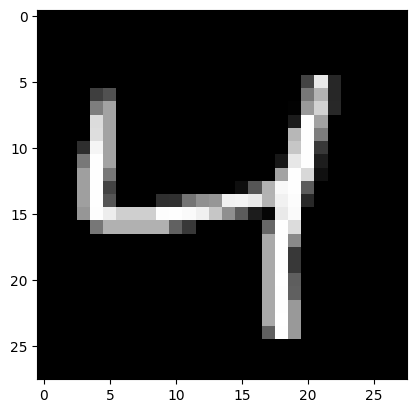

In [54]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[1].reshape(28,28),cmap='gray')
plt.show()

In [55]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten, Dense, Input, Dropout

In [56]:
model=Sequential()

In [57]:
model.add(Conv2D(30,(5,5),activation='relu',padding='same',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(25,(5,5),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [58]:
histr=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 31ms/step - accuracy: 0.7914 - loss: 0.9762 - val_accuracy: 0.9767 - val_loss: 0.0748
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9666 - loss: 0.1173 - val_accuracy: 0.9847 - val_loss: 0.0508
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9731 - loss: 0.0910 - val_accuracy: 0.9839 - val_loss: 0.0516


In [61]:
model.evaluate(xtest,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9810 - loss: 0.0618


[0.05161889269948006, 0.983898401260376]